In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import pathlib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler,PolynomialFeatures
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA=pathlib.Path.cwd()

In [3]:
df=pd.read_csv(DATA/'datasets'/'world_happiness_report'/'2019.csv')

In [4]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Creating the scatterplot for `Score` и `GDP per capita`

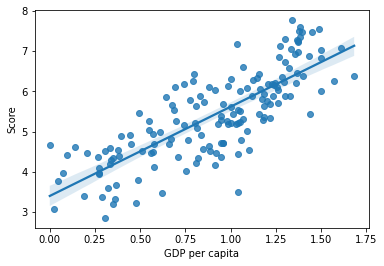

In [5]:
sns.regplot(x=df['GDP per capita'], y=df['Score']);

As we can see from the scatterplot dependence between 'GDP per capita' and 'Score' is well described by linear model.

## Solving a linear regression problem using gradient descent

Description:
- `X` - matrix of features
- `y` - target values
- `theta` - vector of parameters
- `alpha` - learning rate

### Realization of linear regression algorithm

Function for predicting target values

In [6]:
def predict(X, theta):
    prediction = np.dot(X,theta)
    return prediction

Calculating cost function

In [7]:
def cost(y_true, y_estimate):
    m = len(y)
    cost_value = (((y_estimate-y_true)**2).sum())/m
    return cost_value

In [8]:
def get_gradient(X, y, y_estimate):
    error = y_estimate - y
    gradient = (1.0 / len(y)) * X.T.dot(error)
    return gradient

In [9]:
def gradient_descent(X, y, theta, learning_rate, eps, max_iterations):
    cost_history = []
    theta_history = []
    iterations = 1
    while True:
        y_estimate = predict(X, theta) # predicted values with current theta values
        gradient = get_gradient(X, y, y_estimate) # values of partial derivative of cost function with current theta values 
        cost_value = cost(y, y_estimate) # values of cost function with current theta values
        cost_history.append(cost_value)
        new_theta = theta-np.dot(learning_rate, gradient)
        theta_history.append(new_theta)
        # First condition to stop
        if np.sum(new_theta-theta) < eps:
            print("The algorithm converged.")
            break
            
        # Second condition to stop
        if iterations >= max_iterations:
            print("The maximum namber of iterations has been reached")
            break

        #Print information every 100 iterations
        if iterations % 100 == 0:
            print ("Iteration: %d - Error on train data: %.4f" % (iterations, cost_value))

        iterations += 1
        theta = new_theta
    return theta, cost_history, theta_history, iterations


In [10]:
X = df['GDP per capita'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

Dividing dataset on test and train datasets

In [11]:
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=42)

In [12]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train=min_max_scaler.fit_transform(X_train)
X_test=min_max_scaler.transform(X_test)

In [13]:
X_train_df=pd.DataFrame(np.hstack((np.ones(X_train.shape, dtype=float), X_train)))
X_test_df=pd.DataFrame(np.hstack((np.ones(X_test.shape, dtype=float), X_test)))

In [14]:
learning_rate = 0.01
max_iterations = 20000
epsilon = 1e-6

theta = np.random.randn(2,1)

theta, cost_history, theta_history, iterations = gradient_descent(X_train_df, y_train, theta, learning_rate, epsilon, max_iterations)

Iteration: 100 - Error on train data: 2.4647
Iteration: 200 - Error on train data: 0.5095
Iteration: 300 - Error on train data: 0.3656
Iteration: 400 - Error on train data: 0.3548
Iteration: 500 - Error on train data: 0.3537
Iteration: 600 - Error on train data: 0.3534
Iteration: 700 - Error on train data: 0.3532
Iteration: 800 - Error on train data: 0.3530
Iteration: 900 - Error on train data: 0.3529
Iteration: 1000 - Error on train data: 0.3527
Iteration: 1100 - Error on train data: 0.3526
Iteration: 1200 - Error on train data: 0.3524
Iteration: 1300 - Error on train data: 0.3523
Iteration: 1400 - Error on train data: 0.3522
Iteration: 1500 - Error on train data: 0.3521
Iteration: 1600 - Error on train data: 0.3520
Iteration: 1700 - Error on train data: 0.3519
Iteration: 1800 - Error on train data: 0.3519
Iteration: 1900 - Error on train data: 0.3518
Iteration: 2000 - Error on train data: 0.3517
Iteration: 2100 - Error on train data: 0.3517
Iteration: 2200 - Error on train data: 0.35

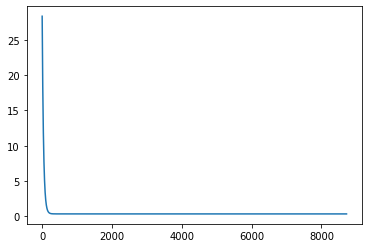

In [15]:
plt.plot(cost_history);

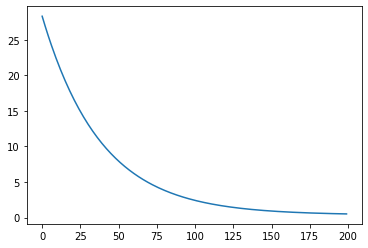

In [16]:
plt.plot(cost_history[:200]);

In [17]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][-1],theta[1][-1]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Number of iterateions: {:d}'.format(iterations))

Theta0:          3.424,
Theta1:          3.705
Final cost/MSE:  0.351
Number of iterateions: 8718


Predicting target values for train and test datasets and calculating mean squared error for these predictions.

In [18]:
y_train_pr=predict(X_train_df, theta)

In [19]:
y_test_pr=predict(X_test_df, theta)

In [20]:
def my_mean_squared_error(y_true, y_predicted):
    m=len(y_true)
    mse = (((y_true-y_predicted)**2).sum())/m
    return mse

In [21]:
my_mean_squared_error(y_train, y_train_pr)

0.441722623489725

In [22]:
my_mean_squared_error(y_test, y_test_pr)

0.5079866623124493

Creating scatterplot for 'Score' and 'GDP per capita' for train and test datasets with real and predicted values

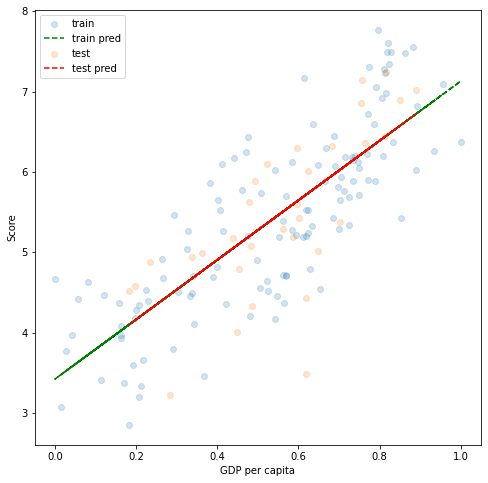

In [23]:
plt.figure(figsize=(8,8))

plt.scatter(X_train_df[1], y_train, label='train', alpha=0.2)
plt.plot(X_train_df[1], y_train_pr, label='train pred', color='g', linestyle='dashed')
plt.scatter(X_test_df[1], y_test, label='test', alpha=0.2)
plt.plot(X_test_df[1], y_test_pr, label='test pred', color='r', linestyle='dashed')

plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.legend();

Linear Regression model training with just 1 feature - 'GDP per capita'

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
lr.coef_, lr.intercept_

(array([[3.7098397]]), array([3.42116754]))

In [26]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

Comparing errors from own realization of linear regression algorithm and linear regression from sklearn.

In [27]:
def get_metrics(y_true, y_predicted):
    params = dict(y_true=y_true, y_pred=y_predicted)
    mse = mean_squared_error(**params)
    rmse = mean_squared_error(**params, squared=False)
    return dict(mse=mse, rmse=rmse)

In [28]:
get_metrics(y_train, y_train_pred)

{'mse': 0.44172119231185786, 'rmse': 0.6646210892770842}

In [29]:
get_metrics(y_test, y_test_pred)

{'mse': 0.5079112698997723, 'rmse': 0.7126789388636178}

The difference is unsignificant.

Training of linear regression model on more features `GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, `Perceptions of corruption` to get the improvement of metrics.

In [30]:
X = pd.DataFrame(df[['GDP per capita', 
                    'Social support', 
                    'Healthy life expectancy', 
                    'Freedom to make life choices',
                    'Generosity', 'Perceptions of corruption']])
y = df['Score']

In [31]:
def get_indices(X):
    train_id, test_id = train_test_split(X.index, test_size=test_size, shuffle=True, random_state=42)
    return train_id, test_id

In [32]:
test_size = 0.2
train_id, test_id = get_indices(X)

In [33]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train = min_max_scaler.fit_transform(X.loc[train_id])
X_test = min_max_scaler.transform(X.loc[test_id])

In [34]:
lr = LinearRegression()

lr.fit(X_train, y.loc[train_id])

LinearRegression()

Predicting target values for train and test datasets and calculating errors.

In [35]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [36]:
get_metrics(y[train_id], y_train_pred)

{'mse': 0.2364699215592196, 'rmse': 0.48628173064512675}

In [37]:
get_metrics(y[test_id], y_test_pred)

{'mse': 0.41446413835283497, 'rmse': 0.6437888926914125}

We obtain better metrics for predictions on train (from mse=0.44172 on 1 feature to mse=0.23646 on few features) and test (from mse=0.50791 on 1 feature to mse= 0.41446 on few features) datasets.

Getting the coefficients of the model for each feature.

In [38]:
importance = lr.coef_
pd.DataFrame(importance, index=X.columns, columns=['coef'])

,coef
GDP per capita,1.264207
Social support,2.001295
Healthy life expectancy,1.062208
Freedom to make life choices,0.940072
Generosity,0.153034
Perceptions of corruption,0.503931


Creating the polynomial features and training the linear regression model on it.

In [39]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
  
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [40]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y.loc[train_id])

LinearRegression()

In [41]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_metrics = get_metrics(y_train, y_train_pred)
    test_metrics = get_metrics(y_test, y_test_pred)

    return dict(train=train_metrics, test=test_metrics)

In [42]:
evaluate_model(poly_model, X_train_poly, X_test_poly, y.loc[train_id], y.loc[test_id])

{'train': {'mse': 0.3539620666897681, 'rmse': 0.5949471125148589},
 'test': {'mse': 0.5170174525146485, 'rmse': 0.7190392565880173}}

 Searching for optimal hyperparameters with 'GridSearchCV'

In [43]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree)),
    ('model', ElasticNet())
])

In [44]:
parameters={'model__alpha':np.arange(0,10,0.1), 'poly_features__degree':np.arange(1,6)}

In [45]:
search = GridSearchCV(
    pipeline,
    parameters,
    cv = 5, 
    scoring="neg_mean_squared_error",
    verbose=3)

In [46]:
search.fit(X_train, y.loc[train_id])

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV 1/5] END model__alpha=0.0, poly_features__degree=1;, score=-0.348 total time=   0.0s
[CV 2/5] END model__alpha=0.0, poly_features__degree=1;, score=-0.244 total time=   0.0s
[CV 3/5] END model__alpha=0.0, poly_features__degree=1;, score=-0.317 total time=   0.0s
[CV 4/5] END model__alpha=0.0, poly_features__degree=1;, score=-0.174 total time=   0.0s
[CV 5/5] END model__alpha=0.0, poly_features__degree=1;, score=-0.286 total time=   0.0s
[CV 1/5] END model__alpha=0.0, poly_features__degree=2;, score=-0.320 total time=   0.0s
[CV 2/5] END model__alpha=0.0, poly_features__degree=2;, score=-0.183 total time=   0.0s
[CV 3/5] END model__alpha=0.0, poly_features__degree=2;, score=-0.349 total time=   0.0s
[CV 4/5] END model__alpha=0.0, poly_features__degree=2;, score=-0.256 total time=   0.0s
[CV 5/5] END model__alpha=0.0, poly_features__degree=2;, score=-0.348 total time=   0.0s
[CV 1/5] END model__alpha=0.0, poly_features__

[CV 1/5] END model__alpha=0.30000000000000004, poly_features__degree=4;, score=-0.515 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004, poly_features__degree=4;, score=-0.830 total time=   0.0s
[CV 3/5] END model__alpha=0.30000000000000004, poly_features__degree=4;, score=-0.553 total time=   0.0s
[CV 4/5] END model__alpha=0.30000000000000004, poly_features__degree=4;, score=-0.887 total time=   0.0s
[CV 5/5] END model__alpha=0.30000000000000004, poly_features__degree=4;, score=-0.793 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004, poly_features__degree=5;, score=-0.514 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004, poly_features__degree=5;, score=-0.828 total time=   0.0s
[CV 3/5] END model__alpha=0.30000000000000004, poly_features__degree=5;, score=-0.553 total time=   0.0s
[CV 4/5] END model__alpha=0.30000000000000004, poly_features__degree=5;, score=-0.872 total time=   0.0s
[CV 5/5] END model__alpha=0.30000000000000004, poly_fea

[CV 3/5] END model__alpha=0.7000000000000001, poly_features__degree=5;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=0.7000000000000001, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=0.7000000000000001, poly_features__degree=5;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=0.8, poly_features__degree=1;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=0.8, poly_features__degree=1;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=0.8, poly_features__degree=1;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=0.8, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=0.8, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=0.8, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=0.8, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=0.8, poly_features__degree=2;, score=-1

[CV 2/5] END model__alpha=1.2000000000000002, poly_features__degree=1;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=1.2000000000000002, poly_features__degree=1;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=1.2000000000000002, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=1.2000000000000002, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=1.2000000000000002, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=1.2000000000000002, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=1.2000000000000002, poly_features__degree=2;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=1.2000000000000002, poly_features__degree=2;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=1.2000000000000002, poly_features__degree=2;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=1.2000000000000002, poly_features__deg

[CV 2/5] END model__alpha=1.6, poly_features__degree=4;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=1.6, poly_features__degree=4;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=1.6, poly_features__degree=4;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=1.6, poly_features__degree=4;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=1.6, poly_features__degree=5;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=1.6, poly_features__degree=5;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=1.6, poly_features__degree=5;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=1.6, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=1.6, poly_features__degree=5;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=1.7000000000000002, poly_features__degree=1;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=1.7000000000000002, poly_features__degree=1;, score=-1.492 total time

[CV 3/5] END model__alpha=2.0, poly_features__degree=5;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=2.0, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=2.0, poly_features__degree=5;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=2.1, poly_features__degree=1;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=2.1, poly_features__degree=1;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=2.1, poly_features__degree=1;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=2.1, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=2.1, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=2.1, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=2.1, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=2.1, poly_features__degree=2;, score=-1.050 total time=   0.0s
[CV 4/5] END model__a

[CV 4/5] END model__alpha=2.4000000000000004, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=2.4000000000000004, poly_features__degree=5;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=2.5, poly_features__degree=1;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=2.5, poly_features__degree=1;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=2.5, poly_features__degree=1;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=2.5, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=2.5, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=2.5, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=2.5, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=2.5, poly_features__degree=2;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=2.5, poly_features__degree=2;, score=-1.562 total time

[CV 3/5] END model__alpha=2.9000000000000004, poly_features__degree=5;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=2.9000000000000004, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=2.9000000000000004, poly_features__degree=5;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=3.0, poly_features__degree=1;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=3.0, poly_features__degree=1;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=3.0, poly_features__degree=1;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=3.0, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=3.0, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=3.0, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=3.0, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=3.0, poly_features__degree=2;, score=-1

[CV 3/5] END model__alpha=3.4000000000000004, poly_features__degree=1;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=3.4000000000000004, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=3.4000000000000004, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=3.4000000000000004, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=3.4000000000000004, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=3.4000000000000004, poly_features__degree=2;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=3.4000000000000004, poly_features__degree=2;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=3.4000000000000004, poly_features__degree=2;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=3.4000000000000004, poly_features__degree=3;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=3.4000000000000004, poly_features__deg

[CV 4/5] END model__alpha=3.8000000000000003, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=3.8000000000000003, poly_features__degree=5;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=3.9000000000000004, poly_features__degree=1;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=3.9000000000000004, poly_features__degree=1;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=3.9000000000000004, poly_features__degree=1;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=3.9000000000000004, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=3.9000000000000004, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=3.9000000000000004, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=3.9000000000000004, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=3.9000000000000004, poly_features__deg

[CV 3/5] END model__alpha=4.3, poly_features__degree=5;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=4.3, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=4.3, poly_features__degree=5;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=4.4, poly_features__degree=1;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=4.4, poly_features__degree=1;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=4.4, poly_features__degree=1;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=4.4, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=4.4, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=4.4, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=4.4, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=4.4, poly_features__degree=2;, score=-1.050 total time=   0.0s
[CV 4/5] END model__a

[CV 5/5] END model__alpha=4.800000000000001, poly_features__degree=2;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=4.800000000000001, poly_features__degree=3;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=4.800000000000001, poly_features__degree=3;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=4.800000000000001, poly_features__degree=3;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=4.800000000000001, poly_features__degree=3;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=4.800000000000001, poly_features__degree=3;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=4.800000000000001, poly_features__degree=4;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=4.800000000000001, poly_features__degree=4;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=4.800000000000001, poly_features__degree=4;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=4.800000000000001, poly_features__degree=4;, sc

[CV 1/5] END model__alpha=5.2, poly_features__degree=4;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=5.2, poly_features__degree=4;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=5.2, poly_features__degree=4;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=5.2, poly_features__degree=4;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=5.2, poly_features__degree=4;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=5.2, poly_features__degree=5;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=5.2, poly_features__degree=5;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=5.2, poly_features__degree=5;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=5.2, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=5.2, poly_features__degree=5;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=5.300000000000001, poly_features__degree=1;, score=-0.971 total time=   0.0s
[CV 2/5

[CV 4/5] END model__alpha=5.7, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=5.7, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=5.7, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=5.7, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=5.7, poly_features__degree=2;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=5.7, poly_features__degree=2;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=5.7, poly_features__degree=2;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=5.7, poly_features__degree=3;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=5.7, poly_features__degree=3;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=5.7, poly_features__degree=3;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=5.7, poly_features__degree=3;, score=-1.562 total time=   0.0s
[CV 5/5] END model__a

[CV 4/5] END model__alpha=6.1000000000000005, poly_features__degree=3;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=6.1000000000000005, poly_features__degree=3;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=6.1000000000000005, poly_features__degree=4;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=6.1000000000000005, poly_features__degree=4;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=6.1000000000000005, poly_features__degree=4;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=6.1000000000000005, poly_features__degree=4;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=6.1000000000000005, poly_features__degree=4;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=6.1000000000000005, poly_features__degree=5;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=6.1000000000000005, poly_features__degree=5;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=6.1000000000000005, poly_features__deg

[CV 4/5] END model__alpha=6.5, poly_features__degree=3;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=6.5, poly_features__degree=3;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=6.5, poly_features__degree=4;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=6.5, poly_features__degree=4;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=6.5, poly_features__degree=4;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=6.5, poly_features__degree=4;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=6.5, poly_features__degree=4;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=6.5, poly_features__degree=5;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=6.5, poly_features__degree=5;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=6.5, poly_features__degree=5;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=6.5, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__a

[CV 4/5] END model__alpha=6.9, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=6.9, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=6.9, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=6.9, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=6.9, poly_features__degree=2;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=6.9, poly_features__degree=2;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=6.9, poly_features__degree=2;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=6.9, poly_features__degree=3;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=6.9, poly_features__degree=3;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=6.9, poly_features__degree=3;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=6.9, poly_features__degree=3;, score=-1.562 total time=   0.0s
[CV 5/5] END model__a

[CV 2/5] END model__alpha=7.300000000000001, poly_features__degree=5;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=7.300000000000001, poly_features__degree=5;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=7.300000000000001, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=7.300000000000001, poly_features__degree=5;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=7.4, poly_features__degree=1;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=7.4, poly_features__degree=1;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=7.4, poly_features__degree=1;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=7.4, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=7.4, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=7.4, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=7.4, poly_features__degree=2

[CV 5/5] END model__alpha=7.800000000000001, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=7.800000000000001, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=7.800000000000001, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=7.800000000000001, poly_features__degree=2;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=7.800000000000001, poly_features__degree=2;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=7.800000000000001, poly_features__degree=2;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=7.800000000000001, poly_features__degree=3;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=7.800000000000001, poly_features__degree=3;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=7.800000000000001, poly_features__degree=3;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=7.800000000000001, poly_features__degree=3;, sc

[CV 4/5] END model__alpha=8.200000000000001, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=8.200000000000001, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=8.200000000000001, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=8.200000000000001, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=8.200000000000001, poly_features__degree=2;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=8.200000000000001, poly_features__degree=2;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=8.200000000000001, poly_features__degree=2;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=8.200000000000001, poly_features__degree=3;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=8.200000000000001, poly_features__degree=3;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=8.200000000000001, poly_features__degree=3;, sc

[CV 3/5] END model__alpha=8.6, poly_features__degree=4;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=8.6, poly_features__degree=4;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=8.6, poly_features__degree=4;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=8.6, poly_features__degree=5;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=8.6, poly_features__degree=5;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=8.6, poly_features__degree=5;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=8.6, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=8.6, poly_features__degree=5;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=8.700000000000001, poly_features__degree=1;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=8.700000000000001, poly_features__degree=1;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=8.700000000000001, poly_features__degree=1;, score=-1.05

[CV 2/5] END model__alpha=9.0, poly_features__degree=5;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=9.0, poly_features__degree=5;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=9.0, poly_features__degree=5;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=9.0, poly_features__degree=5;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=9.1, poly_features__degree=1;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=9.1, poly_features__degree=1;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=9.1, poly_features__degree=1;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=9.1, poly_features__degree=1;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=9.1, poly_features__degree=1;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=9.1, poly_features__degree=2;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=9.1, poly_features__degree=2;, score=-1.492 total time=   0.0s
[CV 3/5] END model__a

[CV 4/5] END model__alpha=9.5, poly_features__degree=2;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=9.5, poly_features__degree=2;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=9.5, poly_features__degree=3;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=9.5, poly_features__degree=3;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=9.5, poly_features__degree=3;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=9.5, poly_features__degree=3;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=9.5, poly_features__degree=3;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=9.5, poly_features__degree=4;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=9.5, poly_features__degree=4;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=9.5, poly_features__degree=4;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=9.5, poly_features__degree=4;, score=-1.562 total time=   0.0s
[CV 5/5] END model__a

[CV 2/5] END model__alpha=9.9, poly_features__degree=3;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=9.9, poly_features__degree=3;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=9.9, poly_features__degree=3;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=9.9, poly_features__degree=3;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=9.9, poly_features__degree=4;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=9.9, poly_features__degree=4;, score=-1.492 total time=   0.0s
[CV 3/5] END model__alpha=9.9, poly_features__degree=4;, score=-1.050 total time=   0.0s
[CV 4/5] END model__alpha=9.9, poly_features__degree=4;, score=-1.562 total time=   0.0s
[CV 5/5] END model__alpha=9.9, poly_features__degree=4;, score=-1.345 total time=   0.0s
[CV 1/5] END model__alpha=9.9, poly_features__degree=5;, score=-0.971 total time=   0.0s
[CV 2/5] END model__alpha=9.9, poly_features__degree=5;, score=-1.492 total time=   0.0s
[CV 3/5] END model__a

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'poly_features__degree': array([1, 2, 3, 4, 5])},
             scoring='neg_mean_squared_error', verbose=3)

In [47]:
search.best_params_

{'model__alpha': 0.0, 'poly_features__degree': 1}

In [48]:
best_model=search.best_estimator_

In [49]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
train_metrics = get_metrics(y.loc[train_id], y_train_pred)
test_metrics = get_metrics(y.loc[test_id], y_test_pred)

In [50]:
train_metrics

{'mse': 0.23646992155921953, 'rmse': 0.4862817306451267}

In [51]:
test_metrics

{'mse': 0.4144641383528349, 'rmse': 0.6437888926914124}

In [52]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [53]:
coefficients

array([0.        , 1.26420675, 2.00129534, 1.06220807, 0.94007222,
       0.15303419, 0.50393133])

In [54]:
feature_names = search.best_estimator_.named_steps['poly_features'].get_feature_names_out()
coef_df = pd.DataFrame(zip(feature_names, coefficients.round(3)), columns=['feature_name', 'coef'])

In [55]:
coef_df

,feature_name,coef
0,1,0.000
1,x0,1.264
2,x1,2.001
3,x2,1.062
4,x3,0.940
5,x4,0.153
6,x5,0.504


In [56]:
coef_df.sort_values('coef', ascending=False)[:10]

,feature_name,coef
2,x1,2.001
1,x0,1.264
3,x2,1.062
4,x3,0.940
6,x5,0.504
5,x4,0.153
0,1,0.000


In [57]:
X.columns.to_frame().reset_index(drop=True).to_dict()[0]

{0: 'GDP per capita',
 1: 'Social support',
 2: 'Healthy life expectancy',
 3: 'Freedom to make life choices',
 4: 'Generosity',
 5: 'Perceptions of corruption'}

The best result we obtain from linear regression model, that trained on six parameters. The best hyperparameters obtained with 'GridSearchCV' is alpha=0 for ElasticNet and best degree=1, so we have linear dependence. The most impact on target value have such feature as 'Social support', 'GDP per capita', 'Healthy life expctancy'.